In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers, metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
dataset_dir = os.path.join(os.getcwd(), "CIFAKE")

img_height = 32
img_width = 32
batch_size = 500

# Load training and validation data
train, val = keras.utils.image_dataset_from_directory(
  os.path.join(dataset_dir, "train"),
  validation_split=0.2,
  subset="both",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Using 20000 files for validation.


In [3]:
# Load test data
test = keras.utils.image_dataset_from_directory(
  os.path.join(dataset_dir, "test"),
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 20000 files belonging to 2 classes.


In [4]:
classes = train.class_names
classes

['FAKE', 'REAL']

In [5]:
# Build model
keras.backend.clear_session()

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")])

In [6]:
# Compile model
model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [8]:
es = EarlyStopping(monitor="val_accuracy",
                   patience=10,
                   restore_best_weights=True,
                   verbose=1)

In [9]:
# Train model
epochs = 80

history = model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  verbose=0,
  callbacks=es)

history = pd.DataFrame(history.history)
pd.set_option("display.max_rows", 80)
display(history)

Restoring model weights from the end of the best epoch: 65.
Epoch 75: early stopping


,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,0.527903,0.716887,0.686674,0.797424,0.382678,0.82130,0.757126,0.946880
1,0.293386,0.876137,0.870650,0.883431,0.262531,0.88740,0.846841,0.946281
2,0.241825,0.900288,0.898010,0.903064,0.217101,0.91215,0.882456,0.951273
3,0.209973,0.914937,0.914005,0.915994,0.215064,0.91125,0.864602,0.975537
4,0.191638,0.923800,0.923306,0.924322,0.226153,0.90170,0.845362,0.983625
5,0.175682,0.931463,0.930565,0.932450,0.213768,0.90910,0.855865,0.984224
6,0.172287,0.932050,0.931420,0.932725,0.168163,0.93075,0.894568,0.976835
7,0.157495,0.938000,0.937321,0.938727,0.141546,0.94425,0.933639,0.956665
8,0.151874,0.940337,0.940591,0.940003,0.130281,0.95045,0.952467,0.948377
9,0.152173,0.939888,0.939854,0.939877,0.128553,0.95110,0.943643,0.959661


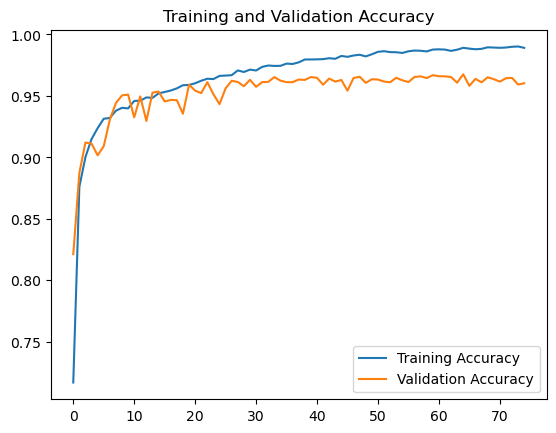

In [10]:
# Plot training and validation accuracy
plt.plot(range((len(history))), history["accuracy"], label="Training Accuracy")
plt.plot(range((len(history))), history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

In [11]:
# Evaluate on test data
model.evaluate(test, return_dict=True)

40/40 [==============================] - 2s 43ms/step - loss: 0.1086 - accuracy: 0.9663 - precision: 0.9702 - recall: 0.9622


{'loss': 0.10860131680965424,
 'accuracy': 0.9663000106811523,
 'precision': 0.9701552987098694,
 'recall': 0.9621999859809875}

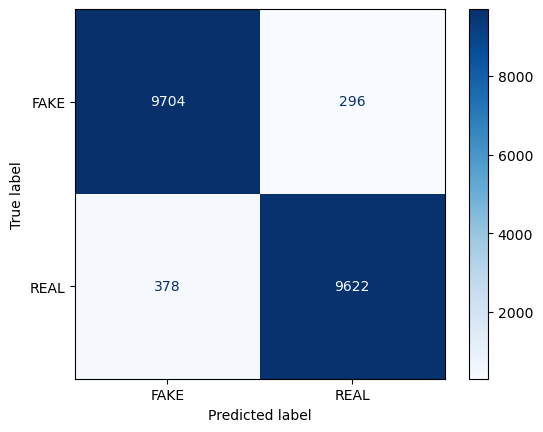

In [12]:
# Confusion matrix
test_predictions = np.array([])
test_labels = np.array([])
for x, y in test:
    test_predictions = np.append(test_predictions, model(x) > 0.5)
    test_labels = np.append(test_labels, y)
ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions, display_labels=classes, cmap="Blues");